# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; overflow:hidden"><b>Import libraries and clean data</b></div>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

df=pd.read_csv("./spotify_data.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Songs & Artist  2500 non-null   object 
 1   Streams         2500 non-null   int64  
 2   Daily           2498 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 58.7+ KB
None
Songs & Artist    0
Streams           0
Daily             2
dtype: int64
                      Songs & Artist     Streams      Daily
0       The Weeknd - Blinding Lights  4463658617  1619447.0
1          Ed Sheeran - Shape of You  4018102402  1001507.0
2  Lewis Capaldi - Someone You Loved  3588673578  1506961.0
3           Harry Styles - As It Was  3544187311  1611374.0
4            Post Malone - Sunflower  3518744128  1337404.0


In [3]:
df_cleaned = df.dropna(subset=['Daily'])

In [4]:
split_columns = df_cleaned['Songs & Artist'].str.split(' - ', n=1, expand=True)

if split_columns.shape[1] == 2:
    df_cleaned[['Song', 'Artist']] = split_columns
else:
    
    df_cleaned['Song'] = split_columns[0]
    df_cleaned['Artist'] = split_columns[1] if split_columns.shape[1] > 1 else None


df_cleaned.drop('Songs & Artist', axis=1, inplace=True)
print(df_cleaned.head())


      Streams      Daily           Song             Artist
0  4463658617  1619447.0     The Weeknd    Blinding Lights
1  4018102402  1001507.0     Ed Sheeran       Shape of You
2  3588673578  1506961.0  Lewis Capaldi  Someone You Loved
3  3544187311  1611374.0   Harry Styles          As It Was
4  3518744128  1337404.0    Post Malone          Sunflower


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; overflow:hidden"><b>Exploratory Data Analysis</b></div>

In [5]:
print(df_cleaned.describe())


            Streams         Daily
count  2.498000e+03  2.498000e+03
mean   9.381018e+08  5.044663e+05
std    4.789547e+08  4.963328e+05
min    5.052491e+08  7.523000e+03
25%    6.097427e+08  2.245135e+05
50%    7.628053e+08  3.763570e+05
75%    1.096359e+09  6.318060e+05
max    4.463659e+09  7.553534e+06


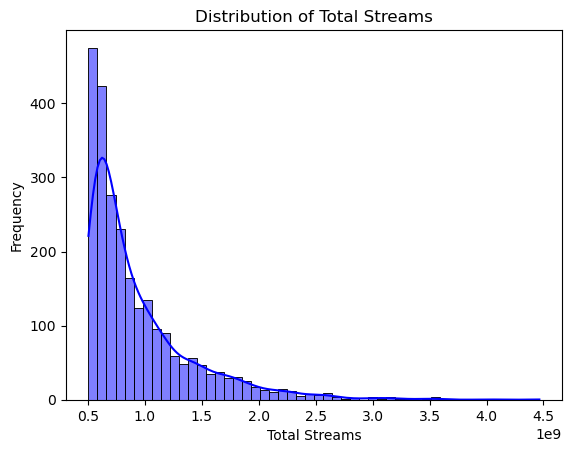

In [6]:
sns.histplot(df_cleaned['Streams'], bins=50, kde=True, color='blue')
plt.title('Distribution of Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Frequency')
plt.show()


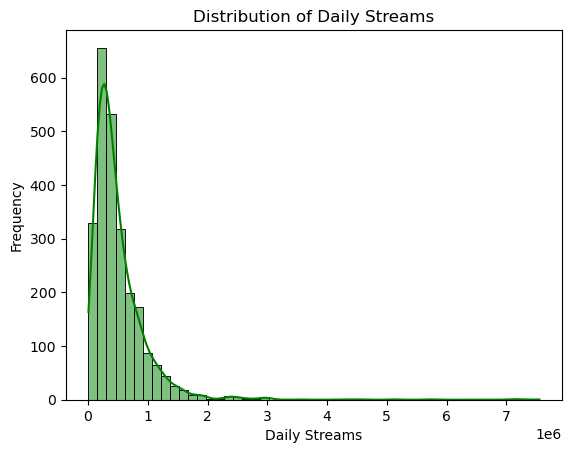

In [7]:
sns.histplot(df_cleaned['Daily'], bins=50, kde=True, color='green')
plt.title('Distribution of Daily Streams')
plt.xlabel('Daily Streams')
plt.ylabel('Frequency')
plt.show()


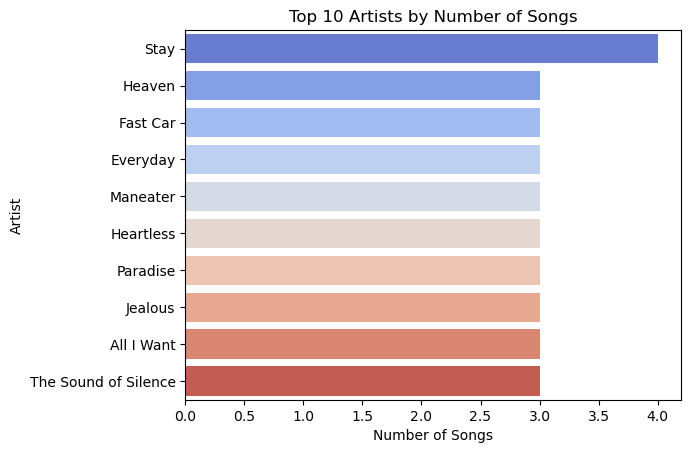

In [8]:
top_artists = df_cleaned['Artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette='coolwarm')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()


                Song             Artist     Streams
0         The Weeknd    Blinding Lights  4463658617
1         Ed Sheeran       Shape of You  4018102402
2      Lewis Capaldi  Someone You Loved  3588673578
3       Harry Styles          As It Was  3544187311
4        Post Malone          Sunflower  3518744128
5         The Weeknd            Starboy  3481137472
6              Drake          One Dance  3343221259
7      The Kid LAROI               STAY  3266446596
8  The Neighbourhood    Sweater Weather  3187169593
9    Imagine Dragons           Believer  3140449933


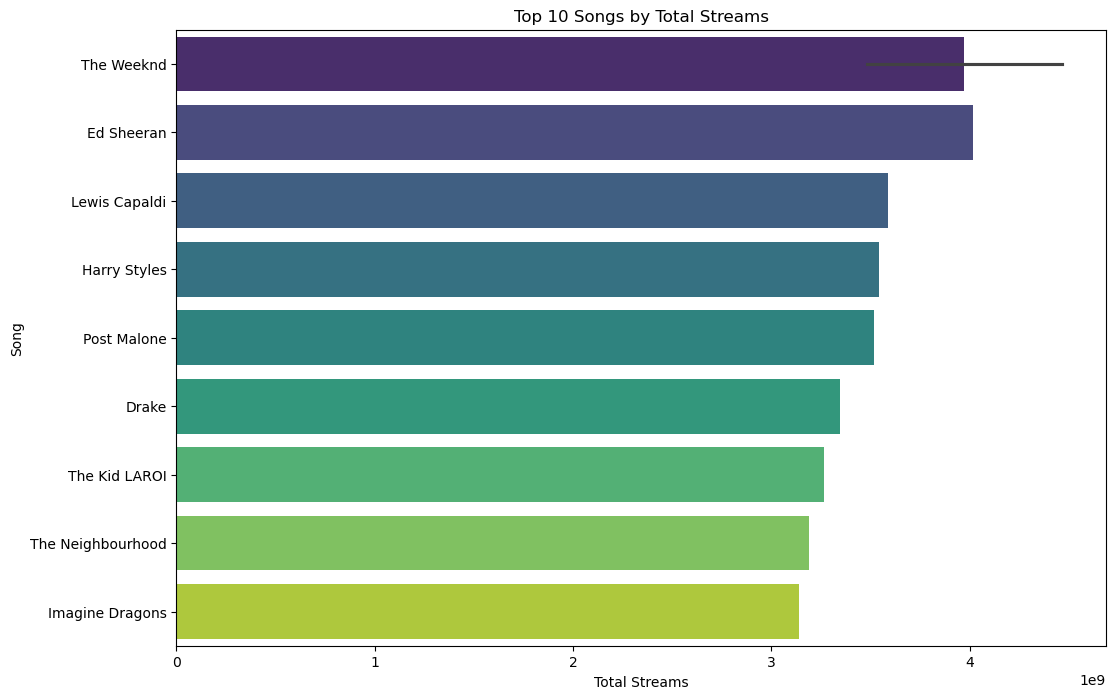

In [9]:
top_streamed = df_cleaned.sort_values(by='Streams', ascending=False).head(10)
print(top_streamed[['Song', 'Artist', 'Streams']])
plt.figure(figsize=(12, 8))
sns.barplot(x='Streams', y='Song', data=top_streamed, palette='viridis')
plt.title('Top 10 Songs by Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Song')
plt.show()


                   Song                Artist      Daily
1911              Jimin                   Who  7553534.0
647       Billie Eilish    BIRDS OF A FEATHER  7194182.0
590         Teddy Swims          Lose Control  7082537.0
418   Sabrina Carpenter              Espresso  5709725.0
1449      Chappell Roan      Good Luck, Babe!  5123739.0
1139  Sabrina Carpenter  Please Please Please  4525181.0
392        Benson Boone      Beautiful Things  4241882.0
1297          Shaboozey    A Bar Song (Tipsy)  3516596.0
850              Hozier             Too Sweet  3011228.0
564          FloyyMenor             Gata Only  2996560.0


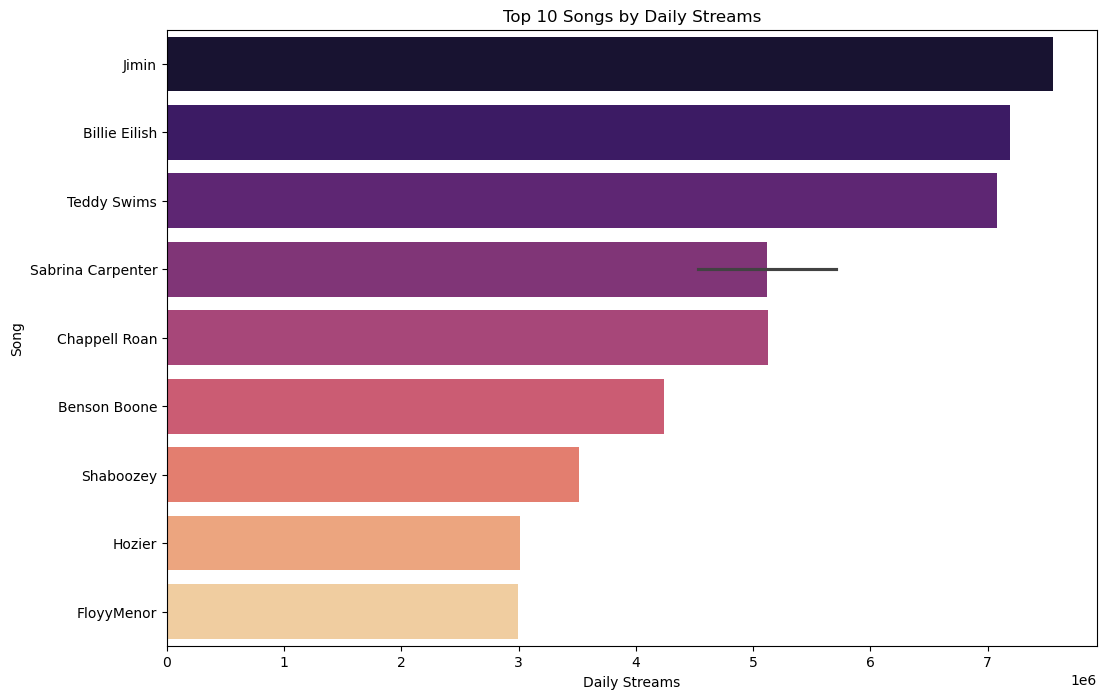

In [10]:
top_daily = df_cleaned.sort_values(by='Daily', ascending=False).head(10)
print(top_daily[['Song', 'Artist', 'Daily']])
plt.figure(figsize=(12, 8))
sns.barplot(x='Daily', y='Song', data=top_daily, palette='magma')
plt.title('Top 10 Songs by Daily Streams')
plt.xlabel('Daily Streams')
plt.ylabel('Song')
plt.show()


Correlation between Streams and Daily Streams: 0.44


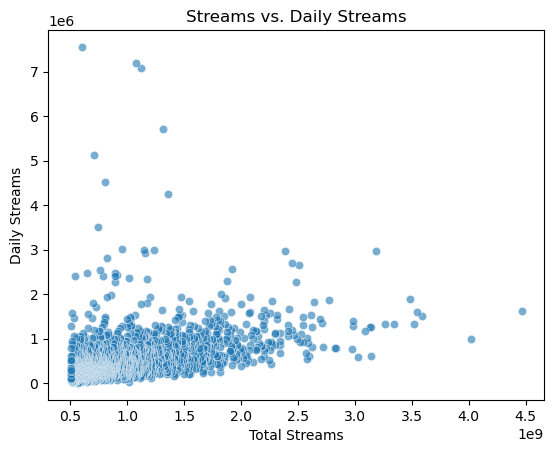

In [11]:
correlation = df_cleaned['Streams'].corr(df_cleaned['Daily'])
print(f'Correlation between Streams and Daily Streams: {correlation:.2f}')

sns.scatterplot(x='Streams', y='Daily', data=df_cleaned, alpha=0.6)
plt.title('Streams vs. Daily Streams')
plt.xlabel('Total Streams')
plt.ylabel('Daily Streams')
plt.show()


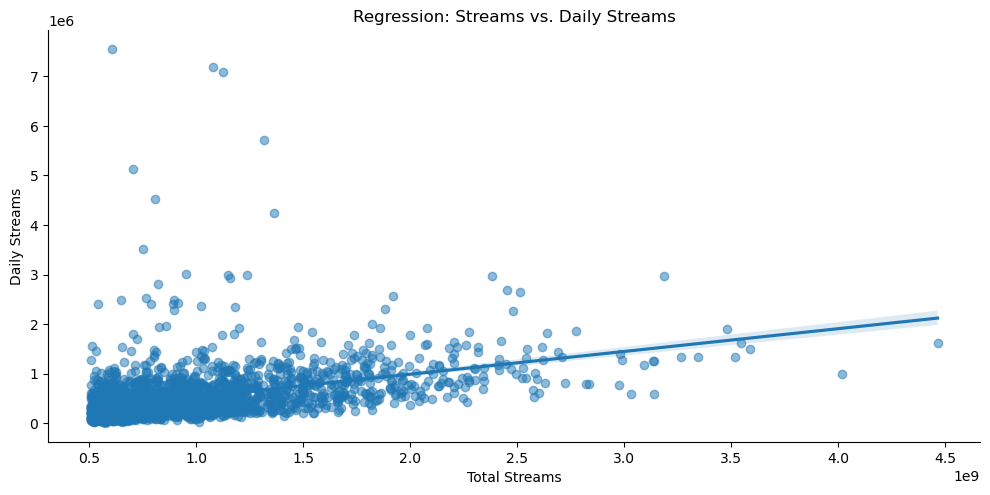

In [12]:
sns.lmplot(x='Streams', y='Daily', data=df_cleaned, aspect=2, scatter_kws={'alpha':0.5})
plt.title('Regression: Streams vs. Daily Streams')
plt.xlabel('Total Streams')
plt.ylabel('Daily Streams')
plt.show()


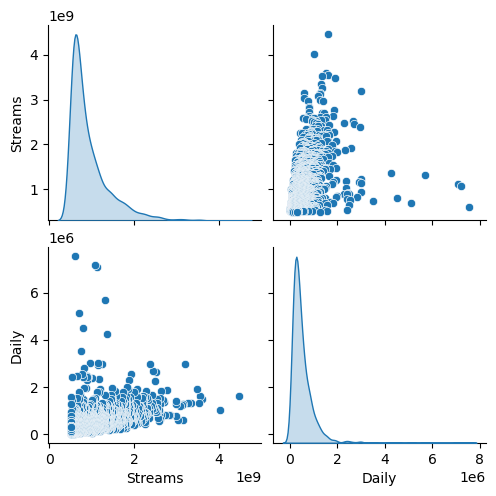

In [13]:
sns.pairplot(df_cleaned[['Streams', 'Daily']], diag_kind='kde')
plt.show()


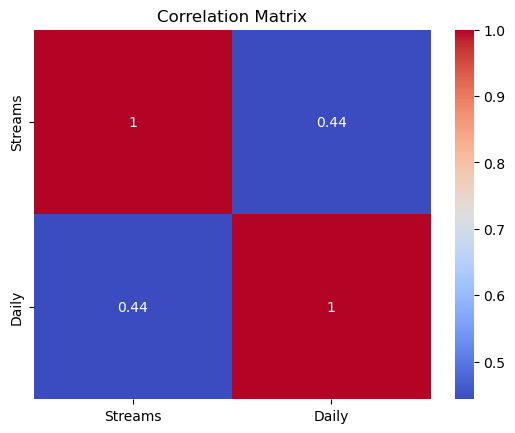

In [14]:
corr_matrix = df_cleaned[['Streams', 'Daily']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


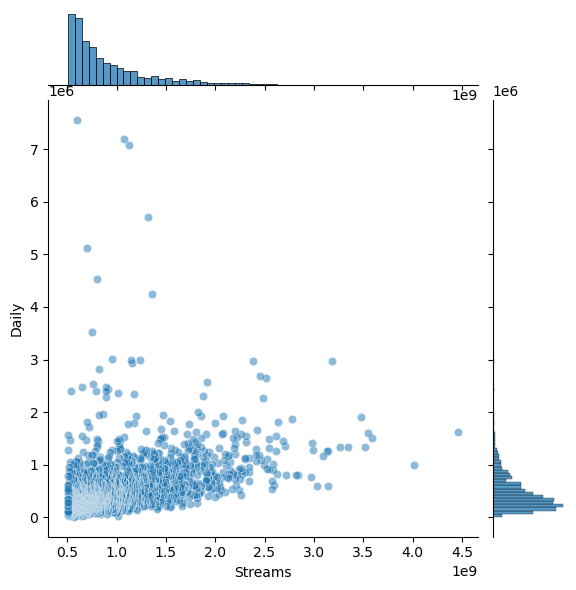

In [15]:
sns.jointplot(x='Streams', y='Daily', data=df_cleaned, kind='scatter', alpha=0.5)
plt.show()


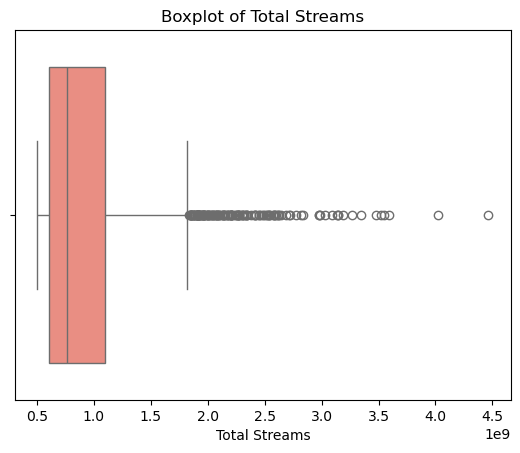

In [16]:
sns.boxplot(x=df_cleaned['Streams'], color='salmon')
plt.title('Boxplot of Total Streams')
plt.xlabel('Total Streams')
plt.show()


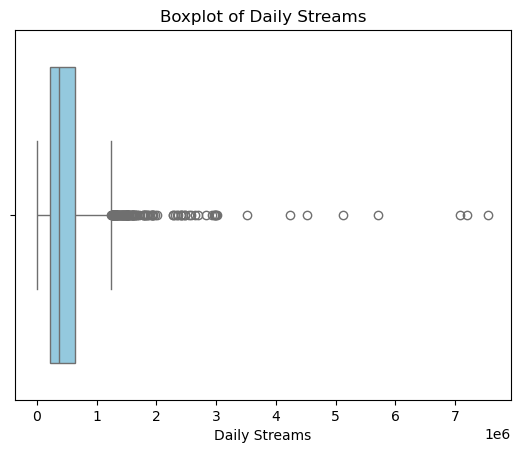

In [17]:
sns.boxplot(x=df_cleaned['Daily'], color='skyblue')
plt.title('Boxplot of Daily Streams')
plt.xlabel('Daily Streams')
plt.show()


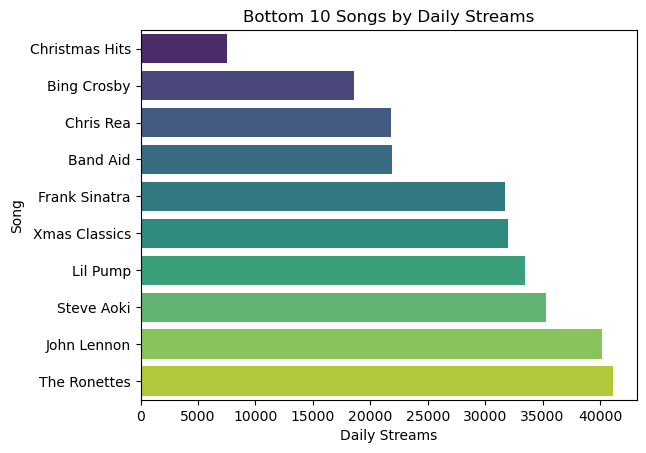

In [18]:
bottom_daily_songs = df_cleaned.sort_values(by='Daily').head(10)
sns.barplot(x='Daily', y='Song', data=bottom_daily_songs, palette='viridis')
plt.title('Bottom 10 Songs by Daily Streams')
plt.xlabel('Daily Streams')
plt.ylabel('Song')
plt.show()


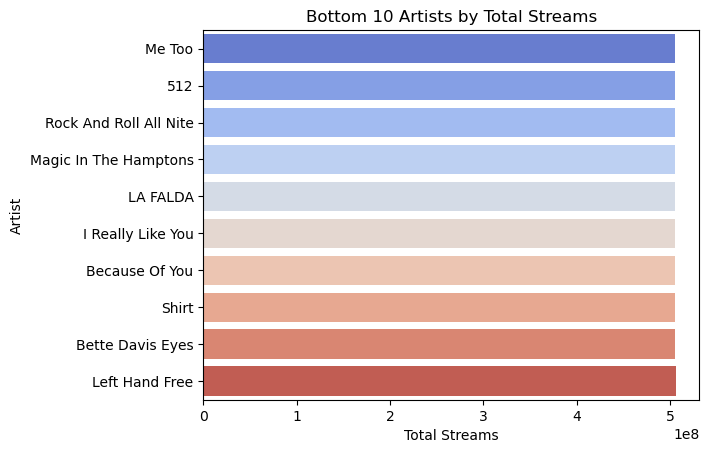

In [19]:
artist_streams_bottom = df_cleaned.groupby('Artist')['Streams'].sum().sort_values().head(10)
sns.barplot(x=artist_streams_bottom.values, y=artist_streams_bottom.index, palette='coolwarm')
plt.title('Bottom 10 Artists by Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Artist')
plt.show()


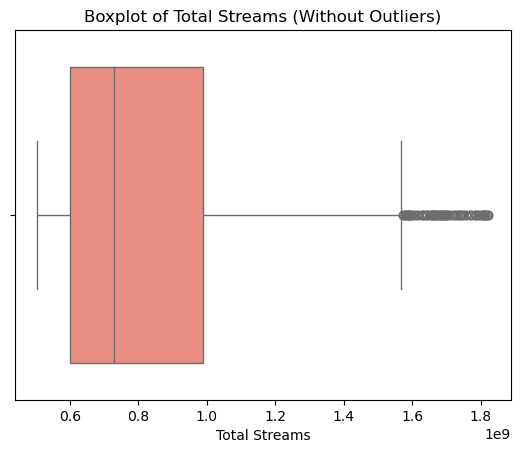

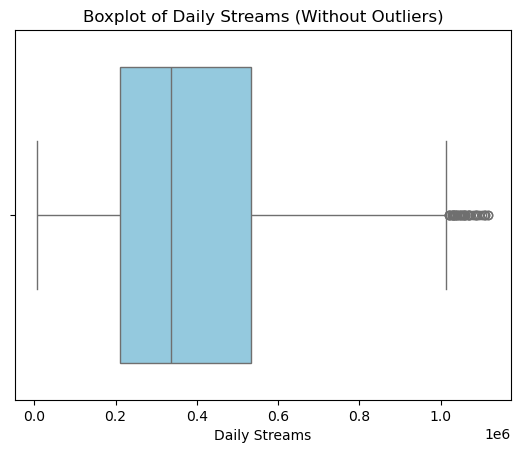

In [20]:
def remove_outliers(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_cleaned[(df_cleaned[column] >= lower_bound) & (df[column] <= upper_bound)]


df_cleaned_no_outliers = remove_outliers(df_cleaned, 'Streams')
df_cleaned_no_outliers = remove_outliers(df_cleaned_no_outliers, 'Daily')

sns.boxplot(x=df_cleaned_no_outliers['Streams'], color='salmon')
plt.title('Boxplot of Total Streams (Without Outliers)')
plt.xlabel('Total Streams')
plt.show()

sns.boxplot(x=df_cleaned_no_outliers['Daily'], color='skyblue')
plt.title('Boxplot of Daily Streams (Without Outliers)')
plt.xlabel('Daily Streams')
plt.show()


# <div style="text-align:center; padding:15px; color:white; margin:0; font-size:150%; font-family:'Times New Roman'; background-color:#1DB954; overflow:hidden"><b>K-Means Clustering</b></div>

In [21]:
features = df_cleaned_no_outliers[['Streams', 'Daily']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


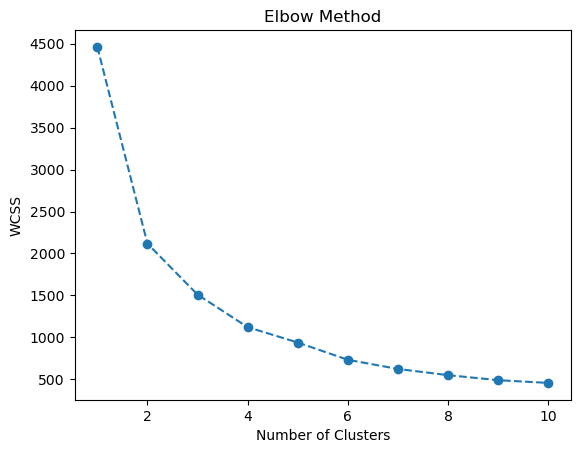

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df_cleaned_no_outliers['Cluster'] = clusters


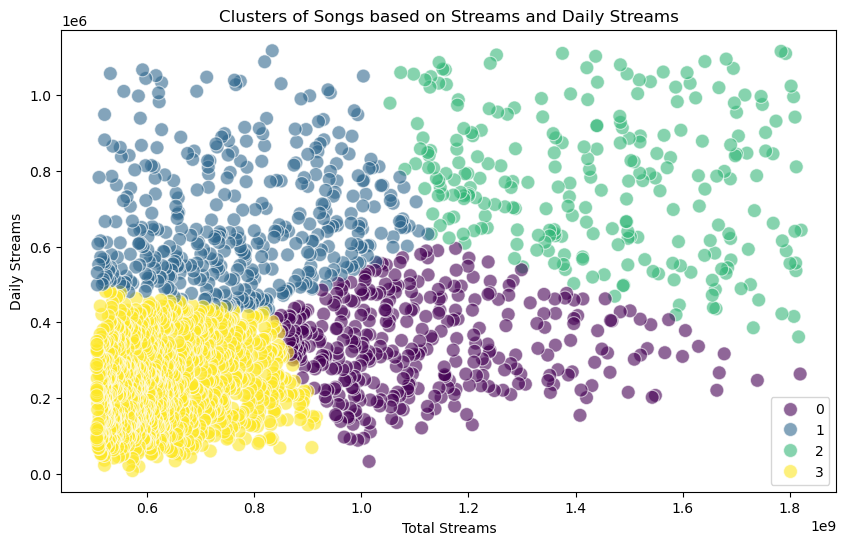

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Streams', y='Daily', hue='Cluster', palette='viridis', data=df_cleaned_no_outliers, s=100, alpha=0.6, edgecolor='w')
plt.title('Clusters of Songs based on Streams and Daily Streams')
plt.xlabel('Total Streams')
plt.ylabel('Daily Streams')
plt.legend()
plt.show()


In [25]:
cluster_summary = df_cleaned_no_outliers.groupby('Cluster')[['Streams', 'Daily']].mean().reset_index()
print(cluster_summary)


   Cluster       Streams          Daily
0        0  1.109968e+09  340984.652291
1        1  7.715120e+08  657372.473558
2        2  1.439244e+09  769900.928571
3        3  6.411423e+08  241951.531879


In [26]:
cluster_names = {
    0: "Moderately Popular",
    1: "Less Popular",
    2: "Super Hits",
    3: "Niche Hits"
}

df_cleaned_no_outliers['Cluster_Name'] = df_cleaned_no_outliers['Cluster'].map(cluster_names)


Cluster_Name
Niche Hits            1192
Less Popular           416
Moderately Popular     371
Super Hits             252
Name: count, dtype: int64


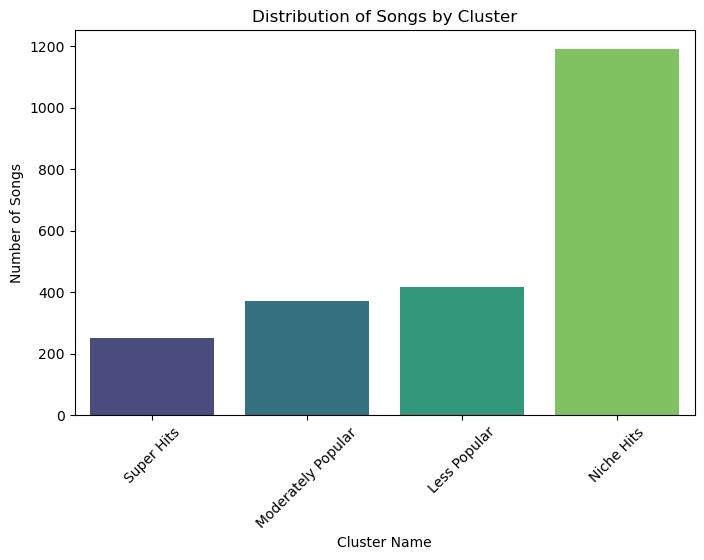

In [27]:
cluster_distribution = df_cleaned_no_outliers['Cluster_Name'].value_counts()
print(cluster_distribution)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned_no_outliers, x='Cluster_Name', palette='viridis')
plt.title('Distribution of Songs by Cluster')
plt.xlabel('Cluster Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()


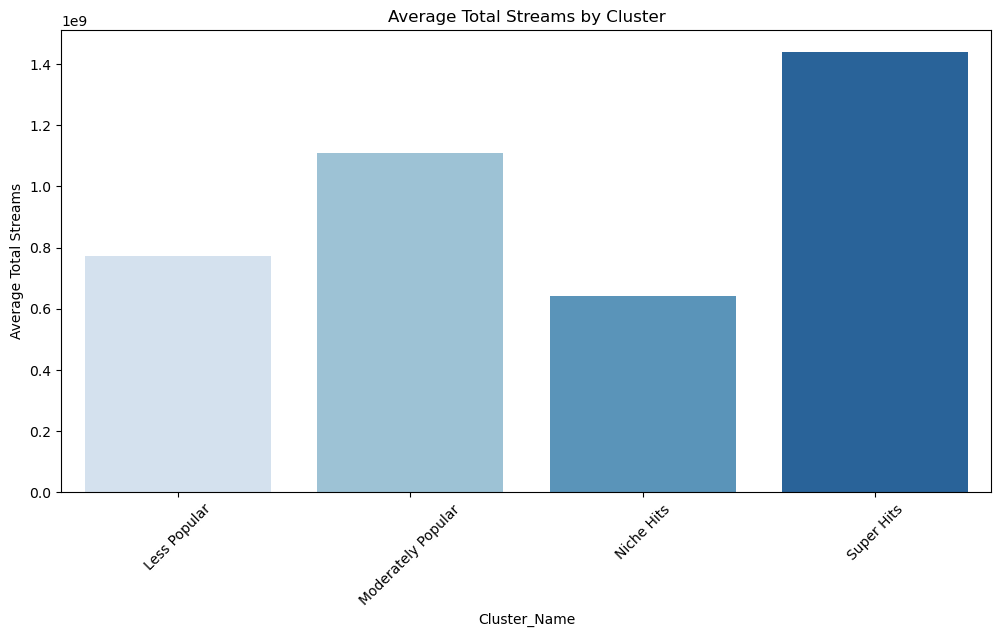

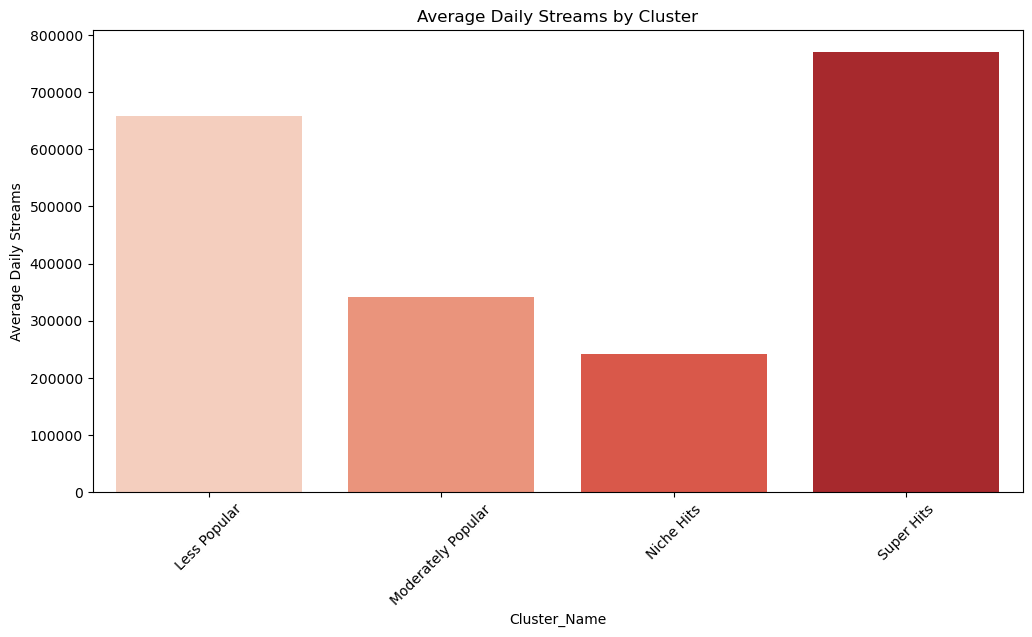

In [28]:
cluster_summary = df_cleaned_no_outliers.groupby('Cluster_Name')[['Streams', 'Daily']].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster_Name', y='Streams', data=cluster_summary, palette='Blues')
plt.title('Average Total Streams by Cluster')
plt.ylabel('Average Total Streams')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster_Name', y='Daily', data=cluster_summary, palette='Reds')
plt.title('Average Daily Streams by Cluster')
plt.ylabel('Average Daily Streams')
plt.xticks(rotation=45)
plt.show()
